### **Importing All Necessary libraries**

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


import warnings
warnings.filterwarnings('ignore')

### Read the `CSV` File

In [4]:
df = pd.read_csv('cars24.csv')
df.head()

,Unnamed: 0,Brand,Model,Make_Year,Price,Location,Distance travelled in km,EMI per month,Fuel type,owner
0,0,Mahindra,Thar,2020,₹11.93L,Delhi,"11,003","22,708",D,1.0
1,1,Tata,NEXON,2023,₹8.81L,Ghaziabad,"10,555","16,768",P,1.0
2,2,Tata,Harrier,2022,₹14.41L,"Golf Course Ext., Gurugram","27,990","27,428",D,1.0
3,3,Ford,Ecosport,2021,₹8.87L,Noida,"23,480","16,883",D,1.0
4,4,Tata,PUNCH,2022,₹7.91L,"Raj Nagar Extension, Ghaziabad",450,"15,464",P,1.0


### Removing the `Unnamed: 0` column

In [8]:
df1 = df.iloc[:,1:]
df1.head()

,Brand,Model,Make_Year,Price,Location,Distance travelled in km,EMI per month,Fuel type,owner
0,Mahindra,Thar,2020,₹11.93L,Delhi,"11,003","22,708",D,1.0
1,Tata,NEXON,2023,₹8.81L,Ghaziabad,"10,555","16,768",P,1.0
2,Tata,Harrier,2022,₹14.41L,"Golf Course Ext., Gurugram","27,990","27,428",D,1.0
3,Ford,Ecosport,2021,₹8.87L,Noida,"23,480","16,883",D,1.0
4,Tata,PUNCH,2022,₹7.91L,"Raj Nagar Extension, Ghaziabad",450,"15,464",P,1.0


## 1. Structure the data

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     500 non-null    object 
 1   Model                     500 non-null    object 
 2   Make_Year                 500 non-null    int64  
 3   Price                     500 non-null    object 
 4   Location                  493 non-null    object 
 5   Distance travelled in km  500 non-null    object 
 6   EMI per month             500 non-null    object 
 7   Fuel type                 500 non-null    object 
 8   owner                     485 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


### - Checking Duplicate Value

In [931]:
df1.duplicated().sum()

71

### - Checking Missing Value

In [932]:
df1.isna().sum()

Brand                        0
Model                        0
Make_Year                    0
Price                        0
Location                     7
Distance travelled in km     0
EMI per month                0
Fuel type                    0
owner                       15
dtype: int64

## 2.Cleaning and transforming the data

### Changing the column names which contain space with underscore

In [933]:
df1.rename(columns={'Distance travelled in km': 'Distance_travelled_in_km', 'EMI per month': 'EMI_per_month',
                    'Fuel type': 'Fuel_type','Price':'Price_in_lakhs'}, inplace=True)

In [14]:
df1.columns

Index(['Brand', 'Model', 'Make_Year', 'Price', 'Location',
       'Distance travelled in km', 'EMI per month', 'Fuel type', 'owner'],
      dtype='object')

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     500 non-null    object 
 1   Model                     500 non-null    object 
 2   Make_Year                 500 non-null    int64  
 3   Price                     500 non-null    object 
 4   Location                  493 non-null    object 
 5   Distance travelled in km  500 non-null    object 
 6   EMI per month             500 non-null    object 
 7   Fuel type                 500 non-null    object 
 8   owner                     485 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [935]:
# checking for the missing values in the location column
df1[df1.Location.isna()]
print(f'The number of missing values present within the range is {len(df1[df1.Location.isna()])}')
# All the missing values are in range of 40 to 60 index value.

,Brand,Model,Make_Year,Price_in_lakhs,Location,Distance_travelled_in_km,EMI_per_month,Fuel_type,owner
41,Volkswagen,Polo,2015,₹3.75L,NaN,"66,024","7,331",P,2.0
43,Maruti,XL6,2023,₹11.91L,NaN,"32,447","22,670",C,1.0
48,Renault,TRIBER,2022,₹6.18L,NaN,"55,853","12,082",P,1.0
49,Tata,NEXON,2021,₹8.02L,NaN,"16,202","15,257",P,1.0
55,Honda,Amaze,2019,₹6.85L,NaN,"44,280","13,392",D,2.0
57,Maruti,Celerio,2016,₹3.85L,NaN,"42,692","7,521",P,1.0
70,Maruti,Baleno,2019,₹6.15L,NaN,"74,173","12,033",P,1.0


The number of missing values present within the range is 7


In [936]:
df1.iloc[40:60]

,Brand,Model,Make_Year,Price_in_lakhs,Location,Distance_travelled_in_km,EMI_per_month,Fuel_type,owner
40,Honda,BR-V,2016,₹6.36L,Mumbai,"76,286","12,434",P,2.0
41,Volkswagen,Polo,2015,₹3.75L,NaN,"66,024","7,331",P,2.0
42,KIA,SELTOS,2022,₹13.99L,Mumbai,"23,256","26,629",P,1.0
43,Maruti,XL6,2023,₹11.91L,NaN,"32,447","22,670",C,1.0
44,Tata,Harrier,2019,₹12.33L,Mumbai,"57,103","23,469",D,1.0
45,Maruti,XL6,2023,₹11.36L,Mumbai,"21,398","21,623",P,1.0
46,Hyundai,NEW I20,2022,₹8.49L,Mumbai,"8,477","16,160",P,1.0
47,Maruti,New Wagon-R,2020,₹4.97L,Mumbai,"25,325","9,716",C,1.0
48,Renault,TRIBER,2022,₹6.18L,NaN,"55,853","12,082",P,1.0
49,Tata,NEXON,2021,₹8.02L,NaN,"16,202","15,257",P,1.0


### Examining the rows with index range of 40 to 60

### Checking for the unique values within the choosen range

In [937]:
df1[40:60].Location.value_counts()

Location
Mumbai     8
Mumbai     6
Name: count, dtype: int64

> It can be seen that the `Mumbai` and `Mumbai ` are of same location which are taken as two different locations.

> Before handling the location, we must rename `Mumbai `with `Mumbai`.


### replacing the `Mumbai` with `Mumbai`

In [938]:
df1.Location[40:60].replace('Mumbai ','Mumbai',inplace = True)

In [939]:
df1.Location[40:75]

40       Mumbai
41          NaN
42       Mumbai
43          NaN
44       Mumbai
45       Mumbai
46       Mumbai
47       Mumbai
48          NaN
49          NaN
50       Mumbai
51       Mumbai
52       Mumbai
53       Mumbai
54       Mumbai
55          NaN
56       Mumbai
57          NaN
58       Mumbai
59       Mumbai
60    Hyderabad
61    Hyderabad
62    Hyderabad
63    Hyderabad
64    Hyderabad
65    Hyderabad
66    Hyderabad
67    Hyderabad
68    Hyderabad
69    Hyderabad
70          NaN
71    Hyderabad
72    Hyderabad
73    Hyderabad
74    Hyderabad
Name: Location, dtype: object

### Now handling the missing value in the location column.

In [940]:
df1.Location[40:60].fillna('Mumbai',inplace = True)

In [941]:
df1.isna().sum()

Brand                        0
Model                        0
Make_Year                    0
Price_in_lakhs               0
Location                     1
Distance_travelled_in_km     0
EMI_per_month                0
Fuel_type                    0
owner                       15
dtype: int64

In [942]:
df1.iloc[60:80]

,Brand,Model,Make_Year,Price_in_lakhs,Location,Distance_travelled_in_km,EMI_per_month,Fuel_type,owner
60,Maruti,Baleno,2017,₹5.82L,Hyderabad,"12,062","12,951",P,1.0
61,Maruti,Grand Vitara,2023,₹12.10L,Hyderabad,"28,842","23,031",P,1.0
62,Maruti,Ertiga,2022,₹10.34L,Hyderabad,"35,378","19,681",P,1.0
63,Ford,Ecosport,2017,₹6.61L,Hyderabad,"93,259","12,923",D,1.0
64,Maruti,Vitara Brezza,2016,₹7.62L,Hyderabad,"76,173","14,902",D,1.0
65,Mahindra,XUV700,2022,₹17.60L,Hyderabad,"29,358","33,500",D,1.0
66,Hyundai,Elite i20,2017,₹6.36L,Hyderabad,"79,690","12,442",P,1.0
67,Maruti,Swift,2016,₹5.18L,Hyderabad,"77,053","10,127",P,1.0
68,Maruti,Swift,2017,₹5.45L,Hyderabad,"25,847","10,655",P,2.0
69,Honda,Amaze,2019,₹6.95L,Hyderabad,"37,615","13,591",P,1.0


In [943]:
df1.Location.fillna('Hyderabad',inplace = True)

In [944]:
df1.isna().sum()

Brand                        0
Model                        0
Make_Year                    0
Price_in_lakhs               0
Location                     0
Distance_travelled_in_km     0
EMI_per_month                0
Fuel_type                    0
owner                       15
dtype: int64

### Now checking the missing values in owner column

In [945]:
df1[df1.owner.isna()]

,Brand,Model,Make_Year,Price_in_lakhs,Location,Distance_travelled_in_km,EMI_per_month,Fuel_type,owner
24,Maruti,Alto K10,2016,₹3.18L,"Bhoruka Tech Park, Benga...","65,574","6,217",P,NaN
95,Hyundai,Elite i20,2016,₹4.52L,Ahmedabad,"76,800","8,837",P,NaN
145,Hyundai,i10,2013,₹2.64L,Pune,"72,306","6,952",P,NaN
215,Hyundai,Grand i10,2015,₹3.36L,Lucknow,"40,227","6,569",P,NaN
234,Maruti,New Wagon-R,2019,₹4.79L,Jaipur,"39,209","9,365",P,NaN
260,Honda,City,2017,₹7.26L,Kochi,"84,180","14,193",P,NaN
286,Maruti,Dzire,2018,₹5.50L,Nagpur,"52,910","10,753",P,NaN
302,Tata,NEXON,2020,₹7.76L,Coimbatore,"15,196","15,171",P,NaN
304,Honda,Brio,2015,₹3.55L,Coimbatore,"54,174","6,940",P,NaN
326,Hyundai,Elite i20,2017,₹4.22L,Lasudia Mori,"81,906","8,250",P,NaN


### Dropping the null values in the dataframe

In [946]:
df1.dropna(inplace = True)

### Checking for any further missing values

In [947]:
df1.isna().sum()

Brand                       0
Model                       0
Make_Year                   0
Price_in_lakhs              0
Location                    0
Distance_travelled_in_km    0
EMI_per_month               0
Fuel_type                   0
owner                       0
dtype: int64

### Checkinng for duplicated values

In [948]:
df1.duplicated().sum()

70

In [949]:
df1[df1.duplicated()]

,Brand,Model,Make_Year,Price_in_lakhs,Location,Distance_travelled_in_km,EMI_per_month,Fuel_type,owner
100,Tata,Harrier,2022,₹14.41L,"Golf Course Ext., Gurugram","27,990","27,428",D,1.0
101,Mahindra,Thar,2020,₹11.93L,Delhi,"11,003","22,708",D,1.0
102,Ford,Ecosport,2021,₹8.87L,Noida,"23,480","16,883",D,1.0
103,Hyundai,Verna,2020,₹9.88L,Noida,"48,995","18,806",D,1.0
104,Tata,NEXON,2023,₹8.81L,Ghaziabad,"10,555","16,768",P,1.0
...,...,...,...,...,...,...,...,...,...
416,KIA,SELTOS,2019,₹10.18L,Chandigarh,"71,561","19,377",P,2.0
417,Maruti,Ciaz,2018,₹6.59L,Chandigarh,"13,475","14,659",D,1.0
418,Ford,Ecosport,2018,₹5.97L,Chandigarh,"53,530","11,671",D,1.0
419,Hyundai,NEW I20,2020,₹7.45L,Chandigarh,"23,262","14,561",P,2.0


### Dropping the duplicated values

In [950]:
df1.drop_duplicates(keep = 'first',ignore_index = True,inplace = True)

### Checking for duplicated values

In [951]:
df1.duplicated().sum()

0

In [952]:
df1.info()
df1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     415 non-null    object 
 1   Model                     415 non-null    object 
 2   Make_Year                 415 non-null    int64  
 3   Price_in_lakhs            415 non-null    object 
 4   Location                  415 non-null    object 
 5   Distance_travelled_in_km  415 non-null    object 
 6   EMI_per_month             415 non-null    object 
 7   Fuel_type                 415 non-null    object 
 8   owner                     415 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 29.3+ KB


Index(['Brand', 'Model', 'Make_Year', 'Price_in_lakhs', 'Location',
       'Distance_travelled_in_km', 'EMI_per_month', 'Fuel_type', 'owner'],
      dtype='object')

### converting the data types of "Price_in_lakhs" ,"EMI_per_month", "Distance_travelled_in_km", "owner" columns

In [953]:
df1[['Price_in_lakhs','Distance_travelled_in_km','EMI_per_month','owner']].head()

,Price_in_lakhs,Distance_travelled_in_km,EMI_per_month,owner
0,₹11.93L,"11,003","22,708",1.0
1,₹8.81L,"10,555","16,768",1.0
2,₹14.41L,"27,990","27,428",1.0
3,₹8.87L,"23,480","16,883",1.0
4,₹7.91L,450,"15,464",1.0


> To convert both `Price_in_lakhs` and `Distance travelled in km` columns we need to replace special characters from both the columns.

### From price column we need to replace '₹' and 'L' from the data

In [954]:
df1.Price_in_lakhs = df1.Price_in_lakhs.str.replace('₹',"").str.replace("L","")

In [955]:
df1.Price_in_lakhs.head()

0    11.93
1     8.81
2    14.41
3     8.87
4     7.91
Name: Price_in_lakhs, dtype: object

### From distance travelled we need to remove "," and replace with empty space

In [956]:
df1['Distance_travelled_in_km'] = df1['Distance_travelled_in_km'].str.replace(',',"")

In [957]:
df1['Distance_travelled_in_km'].head()

0    11003
1    10555
2    27990
3    23480
4      450
Name: Distance_travelled_in_km, dtype: object

### Now converting the Price and Distance travelled in km columns to numeric

In [958]:
df1['Price_in_lakhs'] = df1['Price_in_lakhs'].astype('float')

In [959]:
df1.Distance_travelled_in_km = pd.to_numeric(df1.Distance_travelled_in_km)

In [960]:
df1.EMI_per_month.head()

0    22,708
1    16,768
2    27,428
3    16,883
4    15,464
Name: EMI_per_month, dtype: object

> Now to convert `EMI_per_month` column to numeric replace special characters with empty string

In [961]:
df1.EMI_per_month = df1.EMI_per_month.str.replace(",",'')

In [962]:
df1.EMI_per_month

0      22708
1      16768
2      27428
3      16883
4      15464
       ...  
410    12258
411    19853
412    15288
413    16750
414    15456
Name: EMI_per_month, Length: 415, dtype: object

### Changing the data type of EMI_per_month

In [963]:
df1.EMI_per_month = df1.EMI_per_month.astype('int')

In [964]:
df1.dtypes

Brand                        object
Model                        object
Make_Year                     int64
Price_in_lakhs              float64
Location                     object
Distance_travelled_in_km      int64
EMI_per_month                 int32
Fuel_type                    object
owner                       float64
dtype: object

### Checking the values in the fuel column

In [965]:
df1.Fuel_type.unique()

array(['D', 'P', 'C'], dtype=object)

### Changing the values of fuel column

In [966]:
df1.Fuel_type = df1.Fuel_type.str.replace('D','Diesel').str.replace('P','Petrol').str.replace('C','CNG')

In [967]:
df1.Fuel_type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [968]:
df1.owner.dtype

dtype('float64')

In [969]:
df1.owner.unique()

array([1., 2.])

In [970]:
df1.owner = df1.owner.astype('int')

In [971]:
df1.owner.dtype

dtype('int32')

In [972]:
df1.owner.unique()

array([1, 2])

> Changing the `owner` column to categorical column since it has only 2 values `1` and `2`

In [973]:
df1.owner = df1.owner.astype('str')

In [974]:
df1.owner.dtype
df1.owner.value_counts()

dtype('O')

owner
1    321
2     94
Name: count, dtype: int64

## 3. UNIVARIANT ANALYSIS

### Count of cars by each brand

In [975]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     415 non-null    object 
 1   Model                     415 non-null    object 
 2   Make_Year                 415 non-null    int64  
 3   Price_in_lakhs            415 non-null    float64
 4   Location                  415 non-null    object 
 5   Distance_travelled_in_km  415 non-null    int64  
 6   EMI_per_month             415 non-null    int32  
 7   Fuel_type                 415 non-null    object 
 8   owner                     415 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 27.7+ KB


In [976]:
df1.Brand.value_counts()

Brand
Maruti        119
Hyundai        87
Honda          51
Tata           47
Renault        26
Ford           20
Mahindra       14
Volkswagen     13
KIA             9
Nissan          8
MG              5
Toyota          5
Datsun          5
Skoda           3
Jeep            3
Name: count, dtype: int64

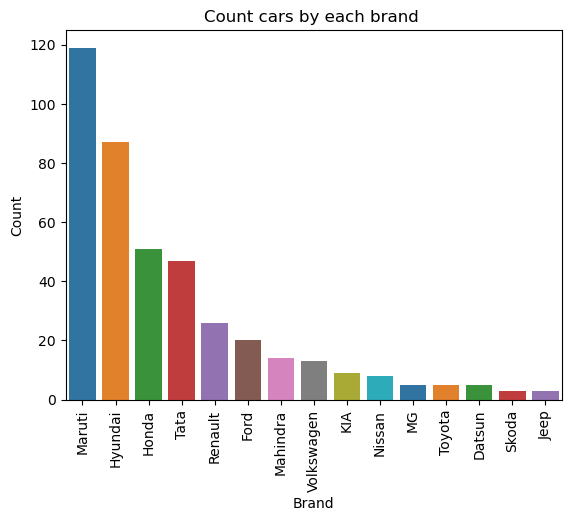

In [977]:
sns.barplot(x = df1.Brand.value_counts().index, y = df1.Brand.value_counts().values,palette = 'tab10')
plt.xticks(rotation = 90)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count cars by each brand ')

plt.show();

In [978]:
print('Maruti :',len(df1.Brand[df1.Brand == 'Maruti']))
print('Hyundai:',len(df1.Brand[df1.Brand == 'Hyundai']))
print('Honda :',len(df1.Brand[df1.Brand == 'Honda']))
print('Tata :',len(df1.Brand[df1.Brand == 'Tata']))
print('Renault :',len(df1.Brand[df1.Brand == 'Renault']))
print('Total rows :',len(df1.Brand))

Maruti : 119
Hyundai: 87
Honda : 51
Tata : 47
Renault : 26
Total rows : 415


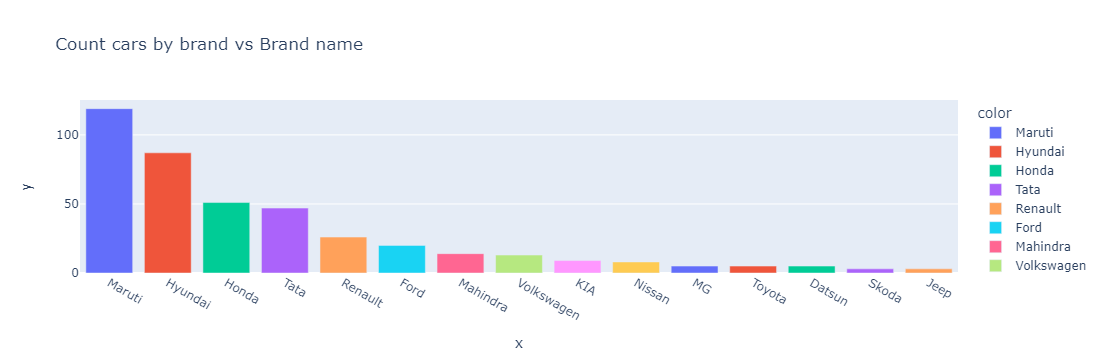

In [979]:
#plotly plot


px.bar(df1,x = df1.Brand.value_counts().index, y = df1.Brand.value_counts().values,color = df1.Brand.value_counts().index,title = 'Count cars by brand vs Brand name')

#### Observations

- Top 5 car brands are Maruthi, Hyundai, Honda, Tata and Ford.
- Maruthi = 119, Hyundai = 87, Honda = 51, Tata = 47, Renault = 26
- 79 percent of the cars comes under these 5 brands.

### Count of cars within Price ranges

In [980]:
df1.Price_in_lakhs.head()

0    11.93
1     8.81
2    14.41
3     8.87
4     7.91
Name: Price_in_lakhs, dtype: float64

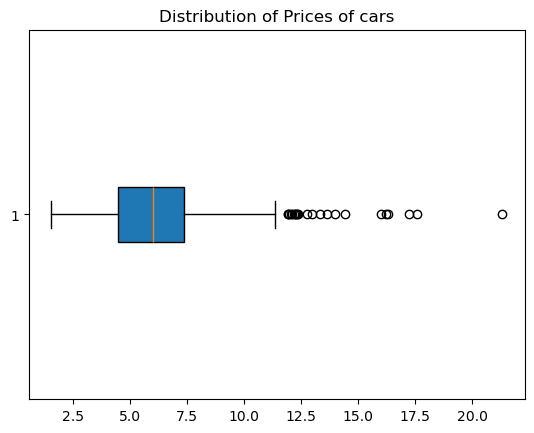

In [981]:
plt.boxplot(df1.Price_in_lakhs,vert = False,patch_artist = True)
plt.title('Distribution of Prices of cars')

plt.show();

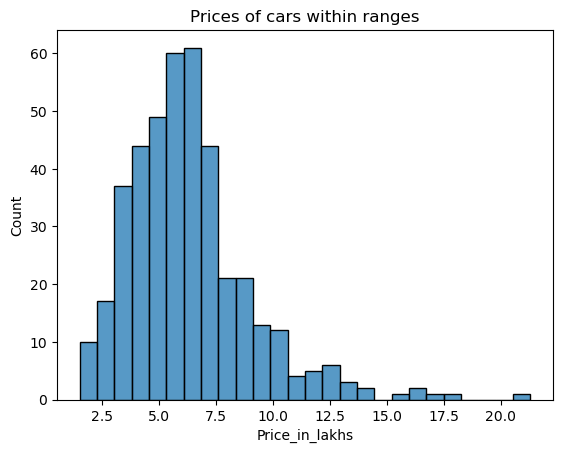

In [982]:
sns.histplot(data = df1, x = 'Price_in_lakhs')
plt.title('Prices of cars within ranges')
plt.show();

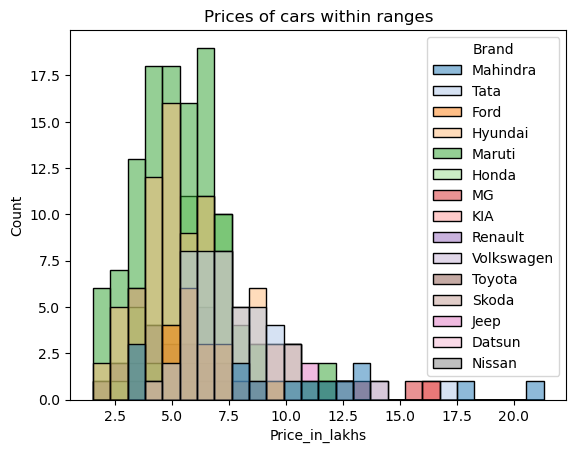

In [983]:
sns.histplot(data = df1, x = 'Price_in_lakhs',hue = 'Brand',palette = 'tab20',legend = True)
plt.title('Prices of cars within ranges')
plt.show();

#### Observation:

- Majority of cars are within price range of 7.5 lakhs.
- Most of the cars are of Brand Maruthi, Hyundai

### Cars made in specific years

In [984]:
# plt.pie(df1.Make_Year.value_counts().index,df1.Make_Year.value_counts().values)
df1.Make_Year.unique()
df1.Make_Year.value_counts()

array([2020, 2023, 2022, 2021, 2019, 2014, 2016, 2018, 2013, 2017, 2015,
       2010, 2012, 2011], dtype=int64)

Make_Year
2022    55
2019    54
2017    54
2018    52
2020    48
2021    43
2016    34
2023    21
2015    20
2014    13
2013    13
2012     5
2011     2
2010     1
Name: count, dtype: int64

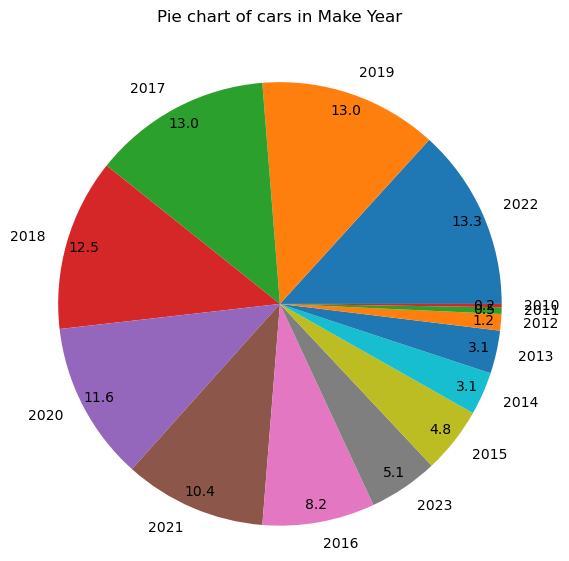

In [1030]:
#plt.figure(figsize= (20,20))

plt.pie(df1.Make_Year.value_counts(),labels = df1.Make_Year.value_counts().index,autopct = '%.1f',pctdistance = 0.92,radius = 1.5)
plt.title('Pie chart of cars in Make Year',loc = 'center',pad = 70)
plt.show();

#### Observations:
- Cars which are made in years 2022, 2019, 2017, 2018, 2020 are more for resale.
- they occupy about 63% in the total cars present.

### Calculating frequency of car's mileage 

In [986]:
df1.Distance_travelled_in_km.head()

0    11003
1    10555
2    27990
3    23480
4      450
Name: Distance_travelled_in_km, dtype: int64

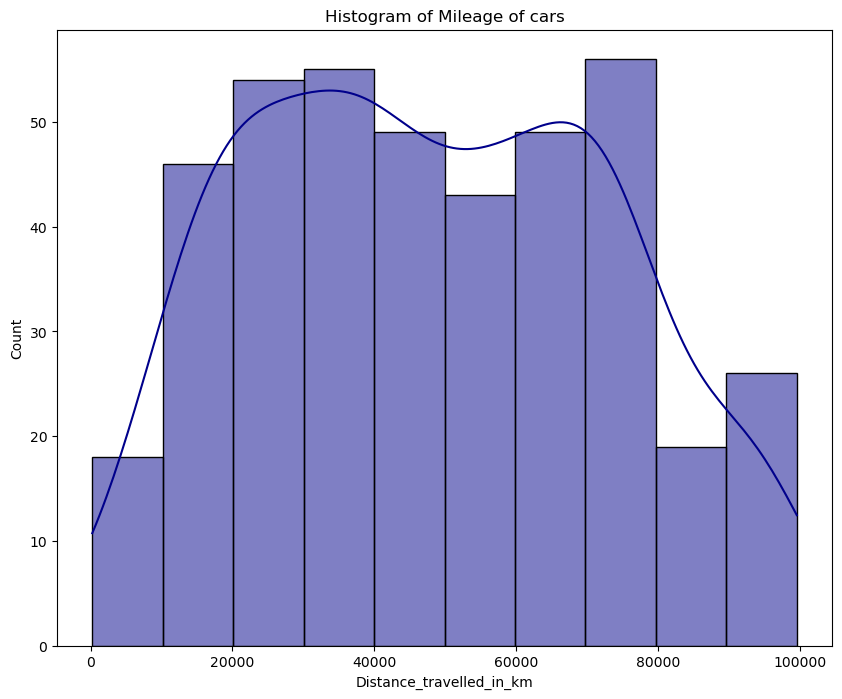

In [987]:
plt.figure(figsize= (10,8))
sns.histplot(data = df1,x = df1.Distance_travelled_in_km,kde=True, color='darkblue')
plt.title('Histogram of Mileage of cars')
plt.show();

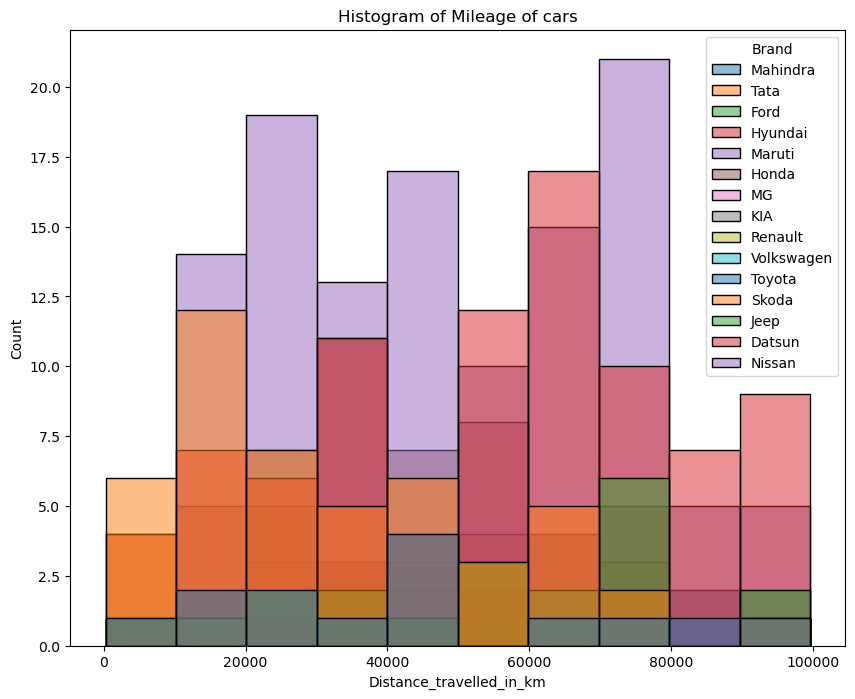

In [988]:
plt.figure(figsize= (10,8))
sns.histplot(data = df1,x = df1.Distance_travelled_in_km,hue = 'Brand',palette = 'tab10')
plt.title('Histogram of Mileage of cars')
plt.show();

#### Observation

- Most cars having mileage with in range 20,000km to 80,000km.
- Nissan, Datsun, Hyundai are brands of cars that is present inthis range.

### Checking the fuel type of cars

In [989]:
df1.Fuel_type.value_counts()

Fuel_type
Petrol    328
Diesel     70
CNG        17
Name: count, dtype: int64

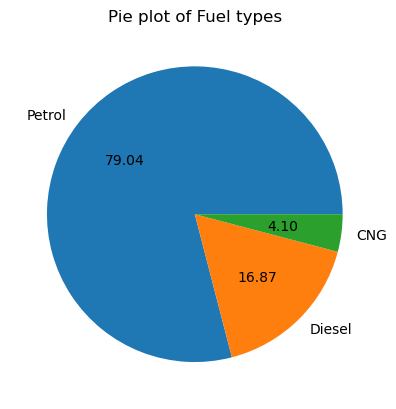

In [990]:
plt.pie(df1.Fuel_type.value_counts().values,labels = df1.Fuel_type.value_counts().index,autopct = '%.2f')
plt.title('Pie plot of Fuel types')
plt.show();

#### Observations:

- Petrol fuel type cars are most available.

### Owner count of car

In [991]:
df1.owner.dtype
df1.owner.value_counts()

dtype('O')

owner
1    321
2     94
Name: count, dtype: int64

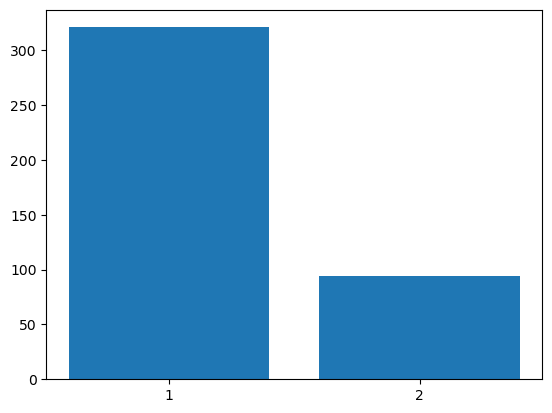

In [992]:
plt.bar(x = df1.owner.value_counts().index,height =df1.owner.value_counts().values)
plt.show();

#### Observation:

> More 75 percent of cars are of first handed.

### Car models and their counts

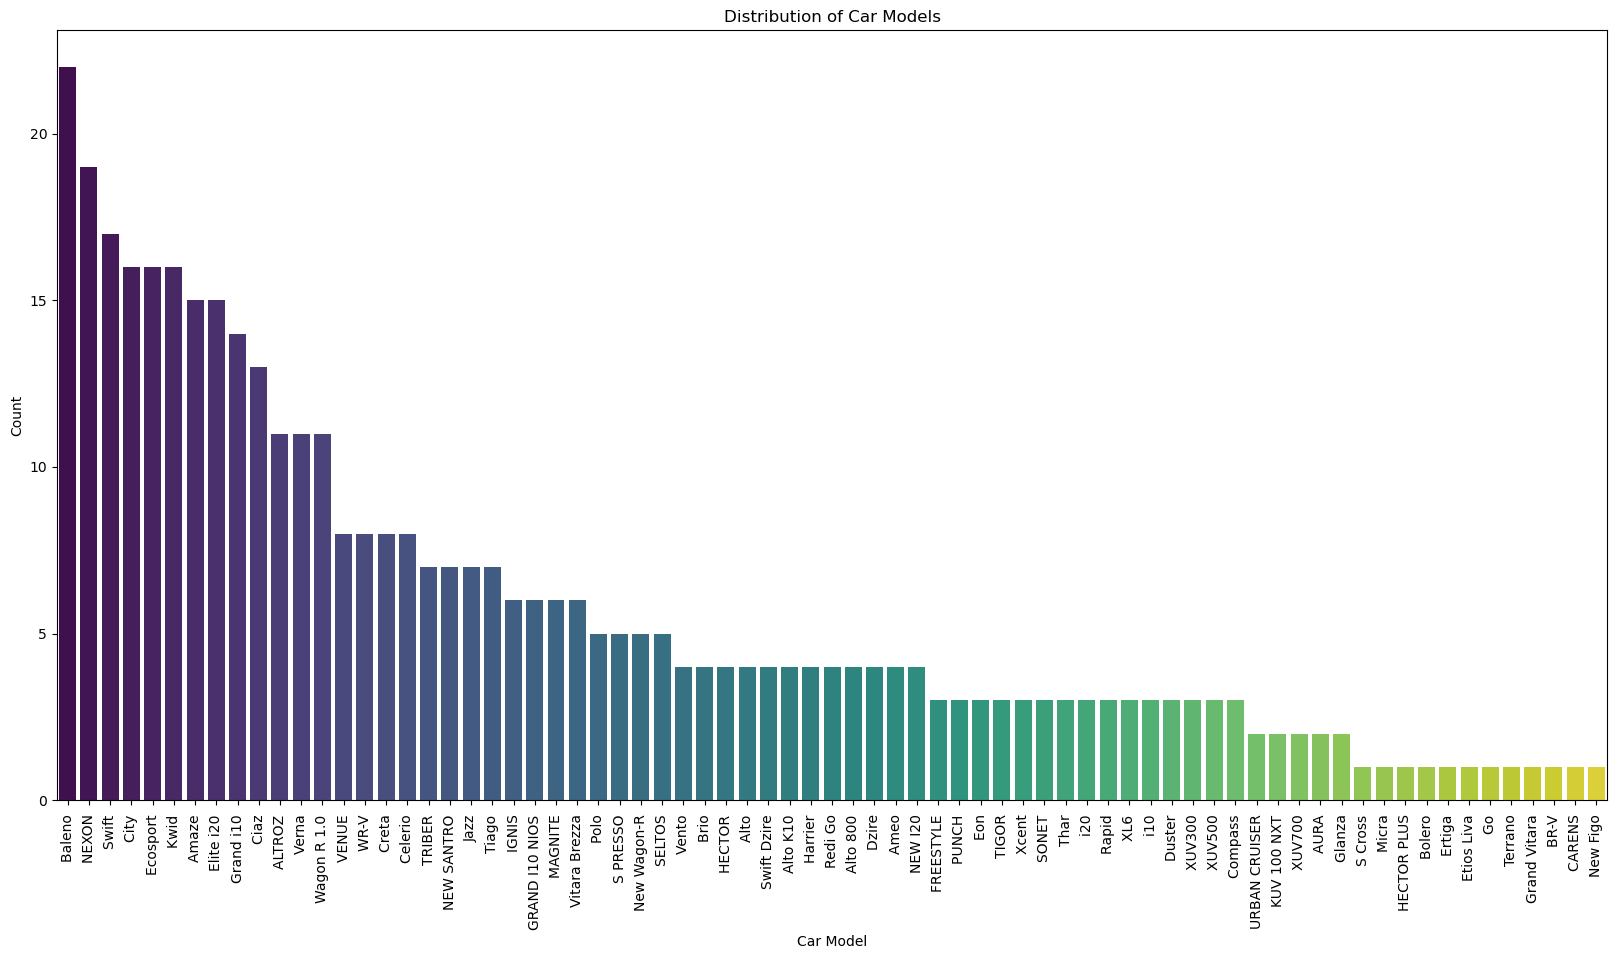

In [993]:
plt.figure(figsize=(20, 10))
sns.barplot(x=df1.Model.value_counts().index, y=df1.Model.value_counts().values, palette='viridis')
plt.title('Distribution of Car Models')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show();

#### Observations:

> Baleno, NEXON, Swift, City and Ecosport are top 5 car models 

## 4. BIVARIANT ANALYSIS

In [994]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     415 non-null    object 
 1   Model                     415 non-null    object 
 2   Make_Year                 415 non-null    int64  
 3   Price_in_lakhs            415 non-null    float64
 4   Location                  415 non-null    object 
 5   Distance_travelled_in_km  415 non-null    int64  
 6   EMI_per_month             415 non-null    int32  
 7   Fuel_type                 415 non-null    object 
 8   owner                     415 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 27.7+ KB


### Brand VS Price

<Figure size 1000x1000 with 0 Axes>

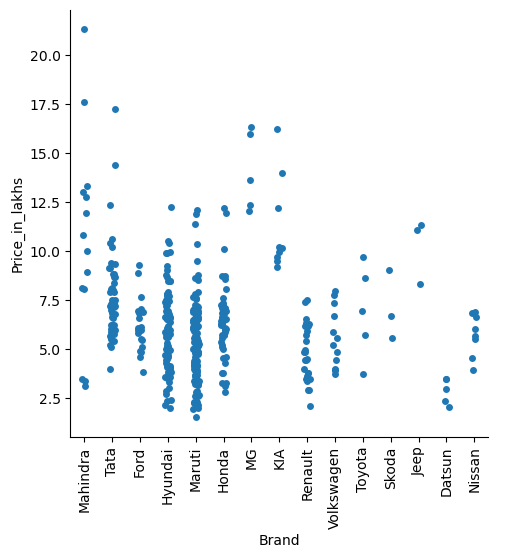

In [995]:
plt.figure(figsize = (10,10))
sns.catplot(data = df1, x = 'Brand', y = 'Price_in_lakhs')
plt.xticks(rotation = 90)
plt.show();

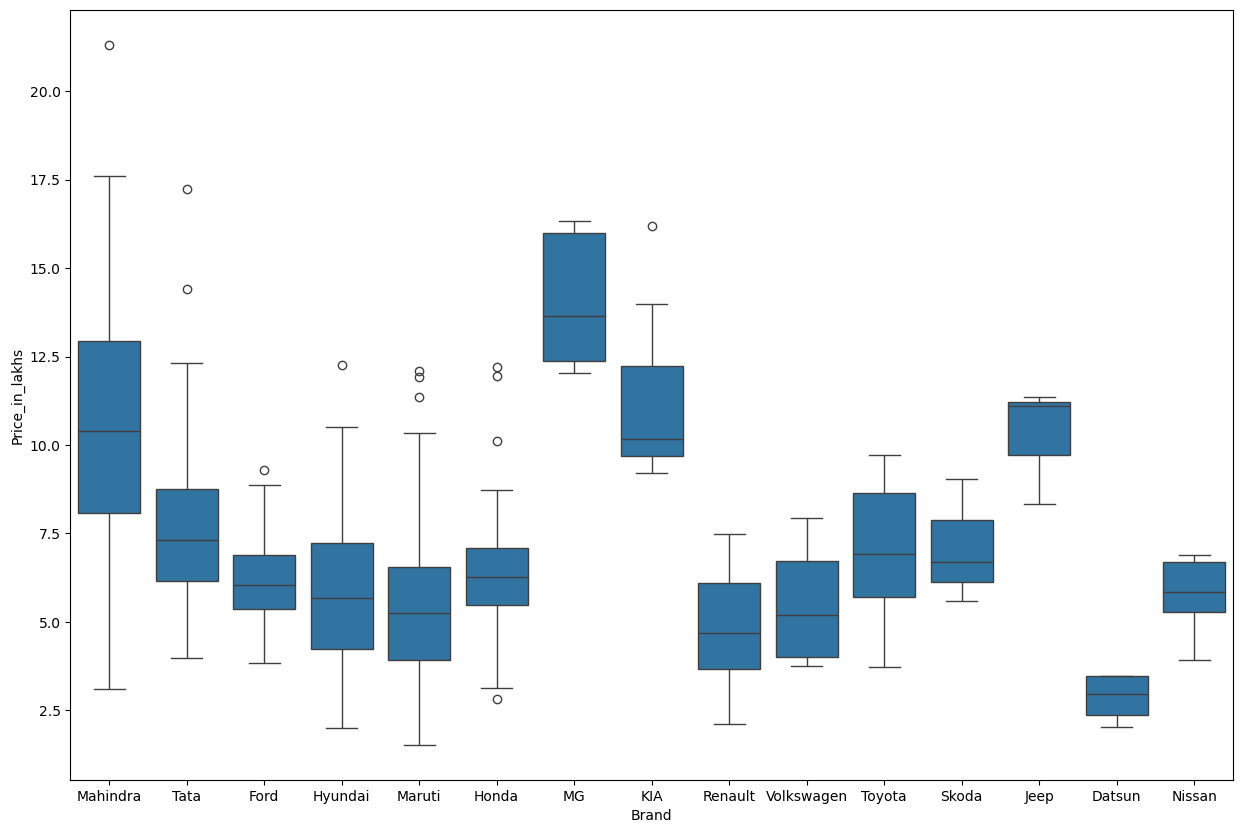

In [996]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df1, x = 'Brand', y = 'Price_in_lakhs')
plt.show();

#### Observations:

- Mahindra car has more spread of data it's price range is 2.8 to 22.5 lakhs.
- MG branded car has the highest starting priceto buy cars.

### Price VS Model

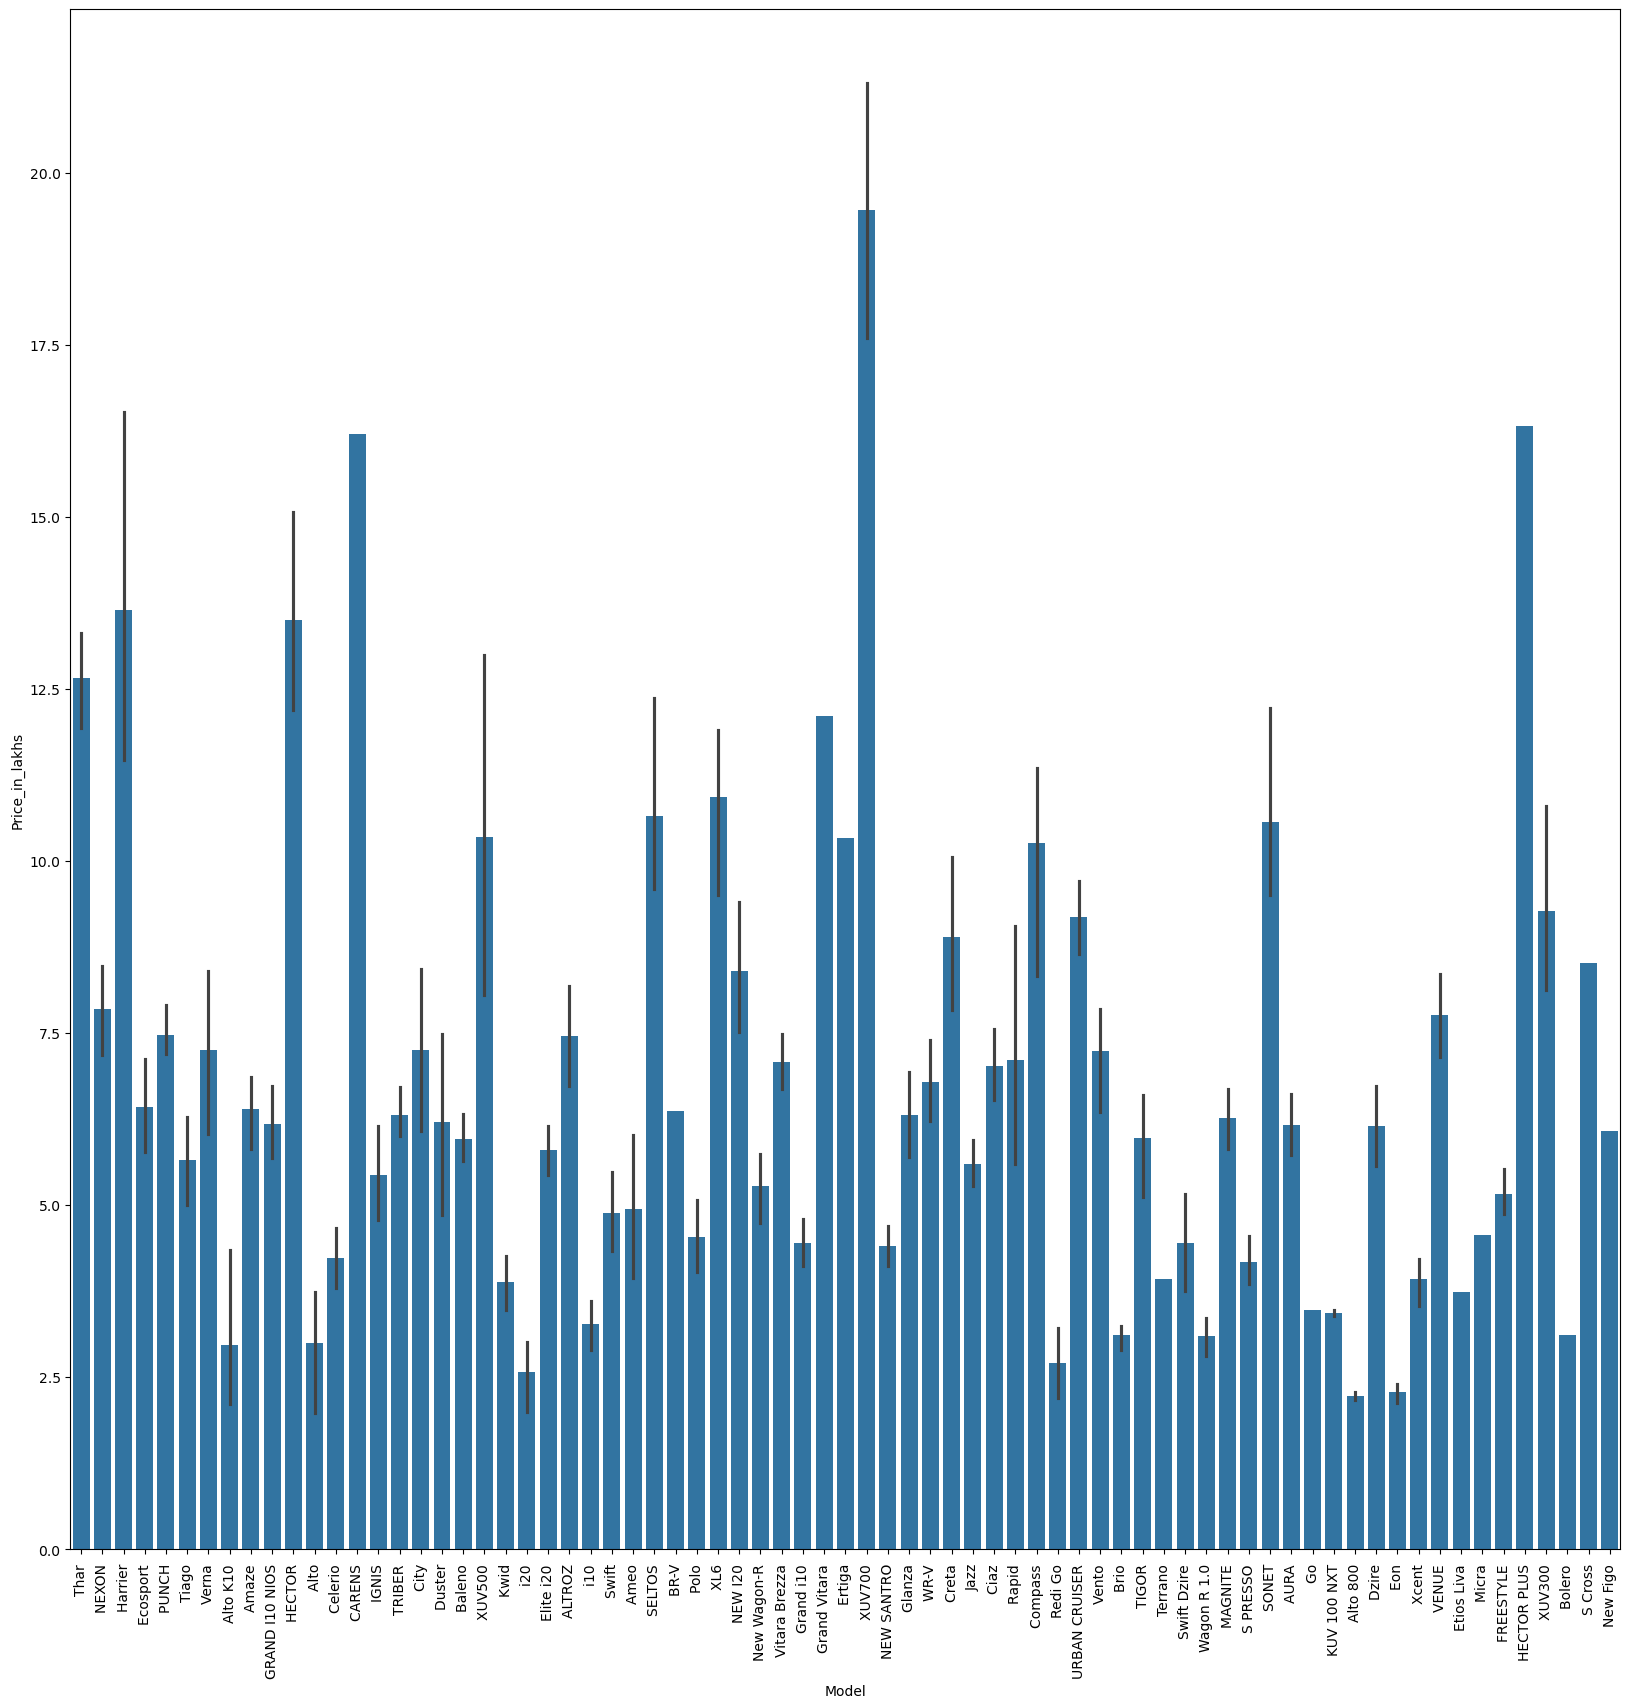

In [997]:
plt.figure(figsize = (20,20))

sns.barplot(data = df1, x = 'Model', y = 'Price_in_lakhs')
plt.xticks(rotation = 90)


plt.show();

In [998]:
data_ = df1[['Model','Price_in_lakhs']].copy()
data_= data_.sort_values(by = ['Price_in_lakhs'],ascending = False)

In [999]:
data_.Model.unique()[:10]

array(['XUV700 ', 'Harrier ', 'HECTOR PLUS ', 'CARENS ', 'HECTOR ',
       'SELTOS ', 'Thar ', 'XUV500 ', 'Creta ', 'SONET '], dtype=object)

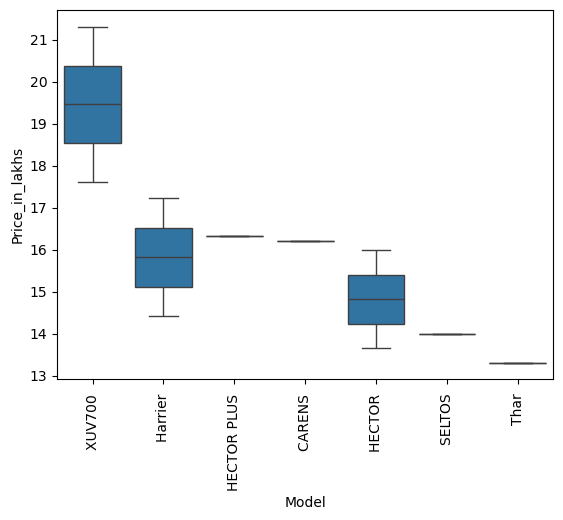

In [1000]:
sns.boxplot(data = data_.head(10) , x = 'Model',y = 'Price_in_lakhs')
plt.xticks(rotation = 90)

plt.show();

#### Observations:

- Top 5 models with maximum price range is XUV700, Harrier, HECTOR PLUS, CARENS, HECTOR.

### Price vs Distance

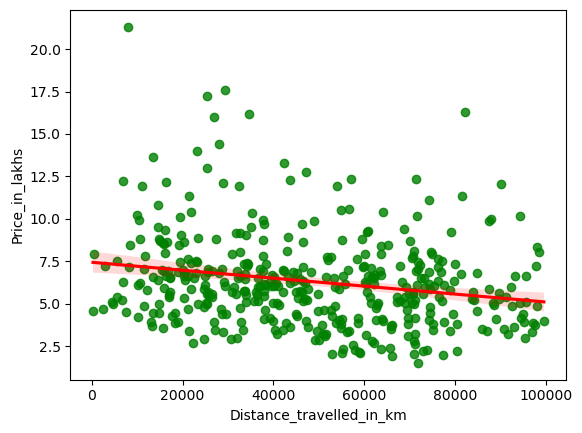

In [1001]:
sns.regplot(x='Distance_travelled_in_km', y='Price_in_lakhs', data=df1,scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'})
plt.show();

#### Observations:

- Price of car is inversely proportional to the Distance travelled by car.
- The more the distance travelled the less the price of the car will be.

### Price VS Fuel type

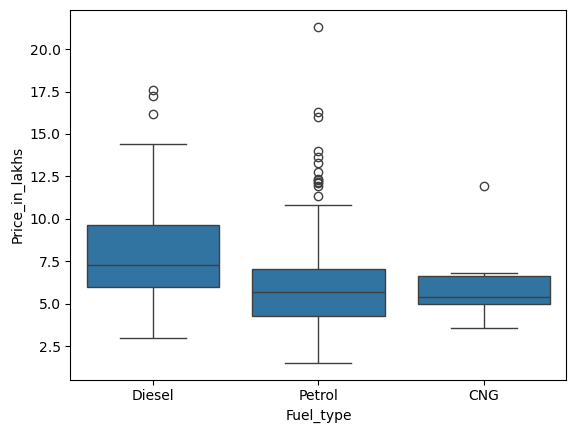

In [1002]:
sns.boxplot(x='Fuel_type', y='Price_in_lakhs', data=df1)
plt.show();

#### Observations:

- Petrol fuel type has wide spread of price.
- The minimum price of the petrol fuel type cars are less comparitively.
- Similarly the maximum price of petrol fuel type cars are more comparitively.
- Diesel comes in second place and them last is CNG.

### Price VS Owner

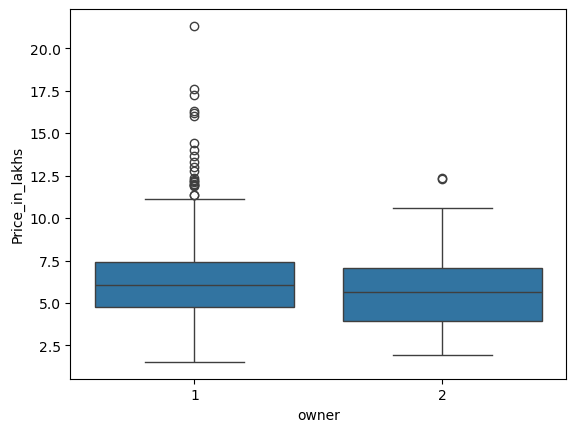

In [1003]:
sns.boxplot(data = df1, y = 'Price_in_lakhs', x = 'owner')
plt.show();

#### Observations:

- Cars which are sold by first owners has price distribution form 1.5 lakhs to 22 lakhs.
- whereas cars that are sold by second owners has price distribution 1.75 lakhs to 12.5 lakhs.

### Fuel type VS Owner

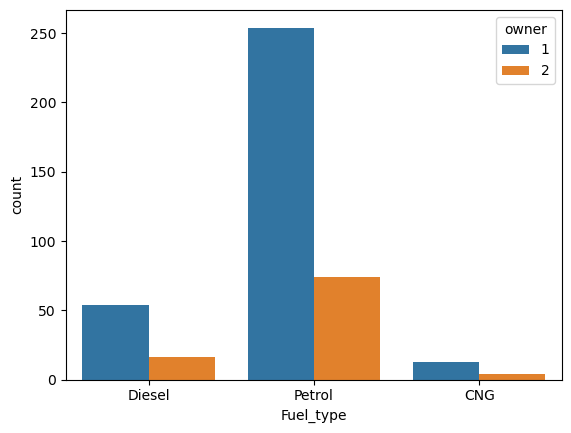

In [1004]:
sns.countplot(x='Fuel_type', hue='owner', data=df1)
plt.show();

#### Observations:

- Petrol fuel type cars are maximum available for resale in both  the category of 1st owner's and 2nd owner's.

## 5. MULTIVARIANT ANALYSIS

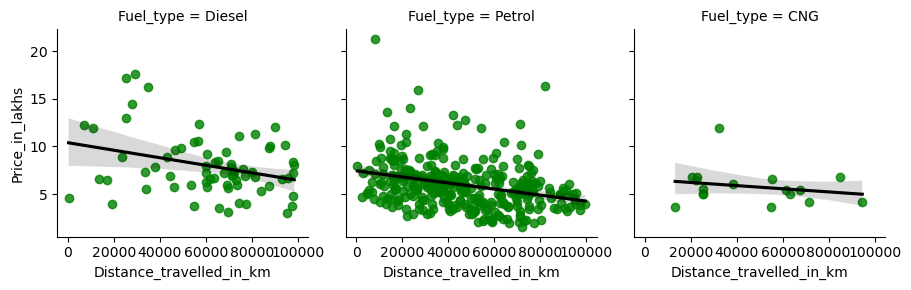

In [1005]:
g = sns.FacetGrid(df1, col='Fuel_type')
g.map(sns.regplot, 'Distance_travelled_in_km', 'Price_in_lakhs',scatter_kws = {'color': 'g'}, line_kws = {'color': 'black'})
g.add_legend()
plt.show();

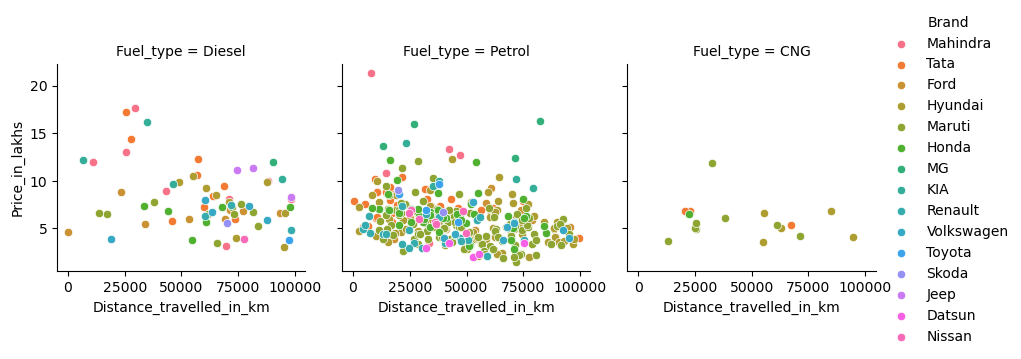

In [1006]:
g = sns.FacetGrid(df1, col='Fuel_type', hue='Brand')
g.map(sns.scatterplot, 'Distance_travelled_in_km', 'Price_in_lakhs')
g.add_legend()
plt.show();

In [1007]:
owner_1 = df1[df1['owner'] == '1']

In [1008]:
owner_2 = df1[df1['owner'] == '2']

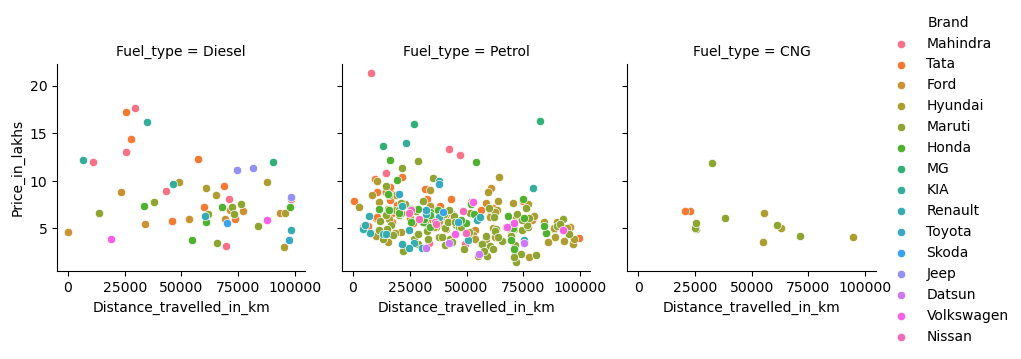

In [1009]:
g = sns.FacetGrid(owner_1, col='Fuel_type', hue='Brand')
g.map(sns.scatterplot, 'Distance_travelled_in_km', 'Price_in_lakhs')
g.add_legend()
plt.show();

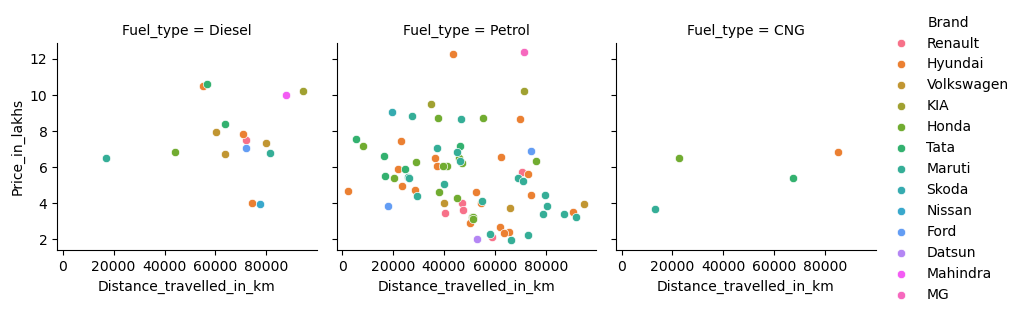

In [1010]:
g = sns.FacetGrid(owner_2, col='Fuel_type', hue='Brand')
g.map(sns.scatterplot, 'Distance_travelled_in_km', 'Price_in_lakhs')
g.add_legend()
plt.show();

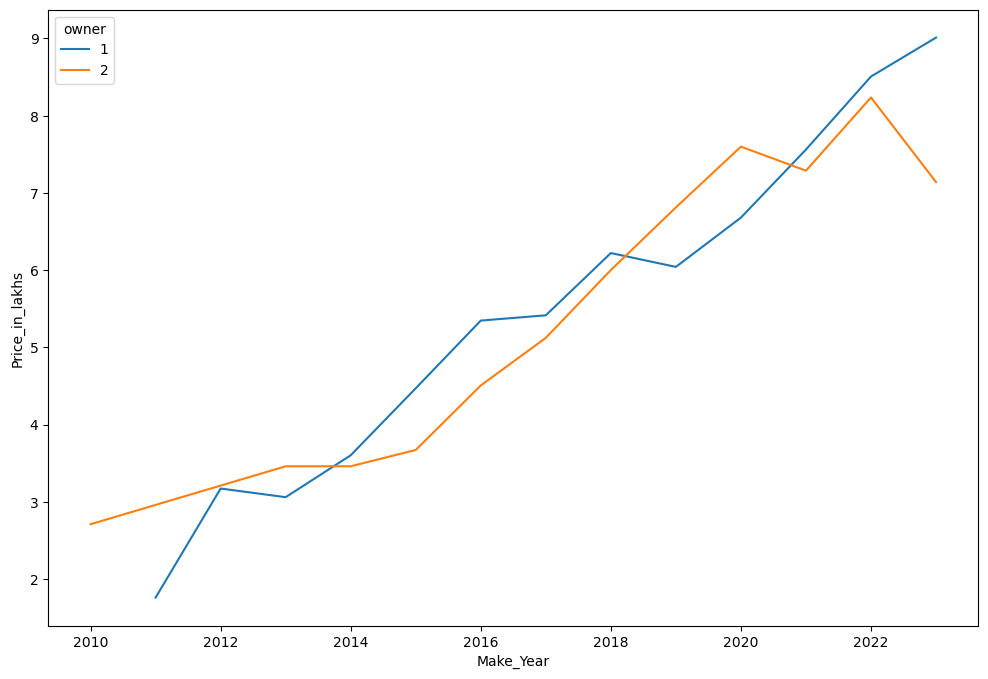

In [1011]:
plt.figure(figsize = (12,8))
sns.lineplot(x=df1['Make_Year'],y=df1['Price_in_lakhs'],errorbar=None,hue=df1['owner'])

plt.show();

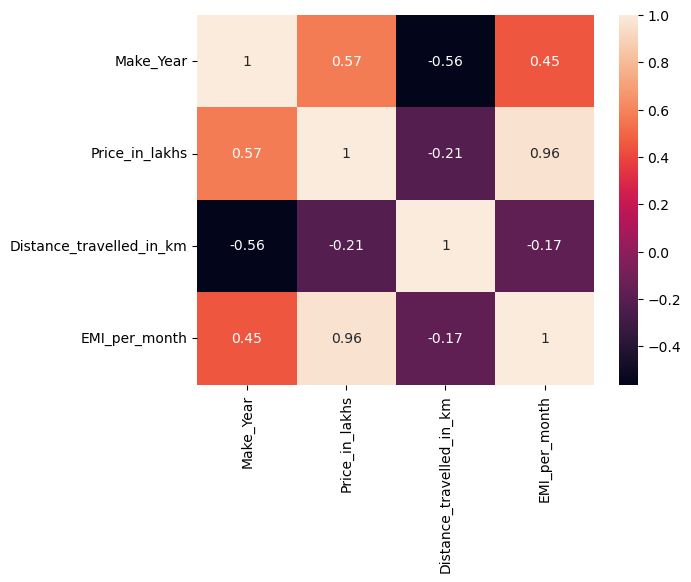

In [1012]:
sns.heatmap(df1.select_dtypes(include='number').corr(),annot=True)

plt.show();

Text(0.5, 1.02, 'Scatterplot Matrix')

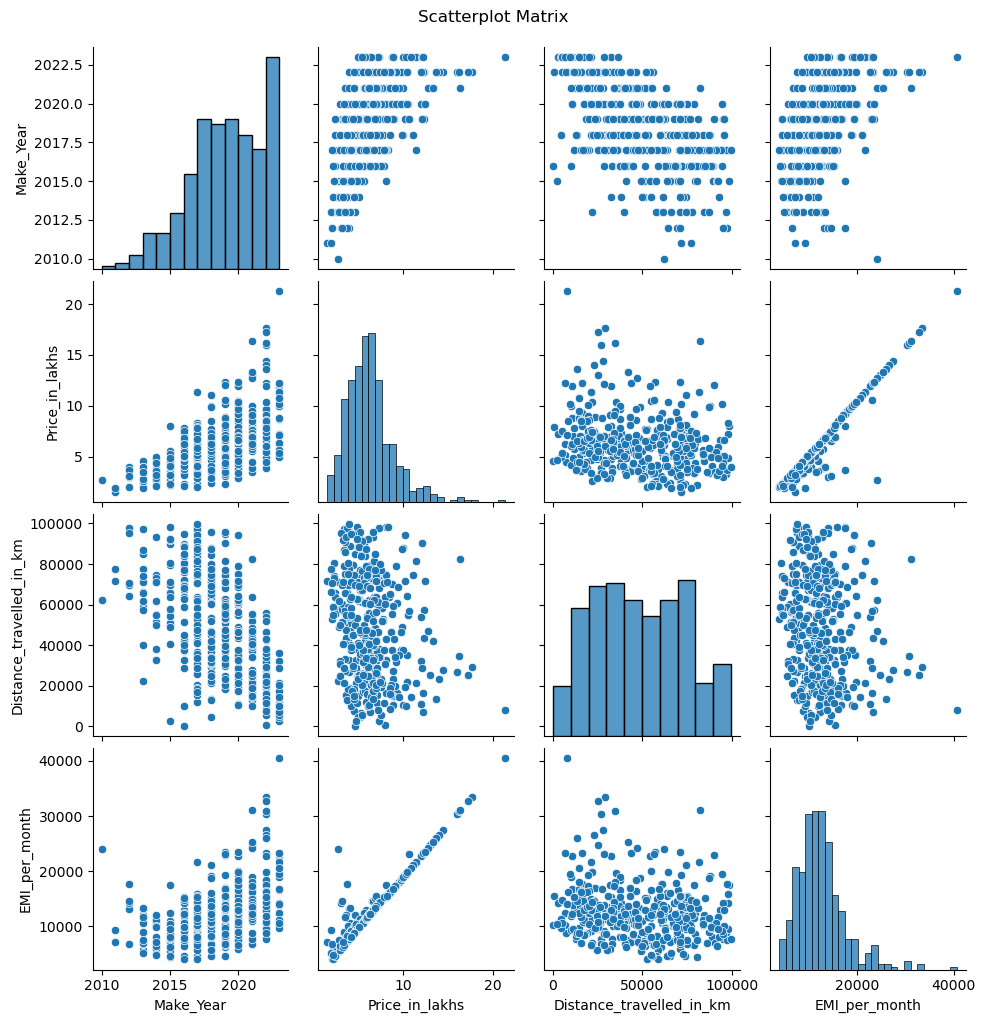

In [1013]:
numeric_cols = ['Make_Year', 'Price_in_lakhs', 'Distance_travelled_in_km', 'EMI_per_month']
sns.pairplot(df1[numeric_cols])
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

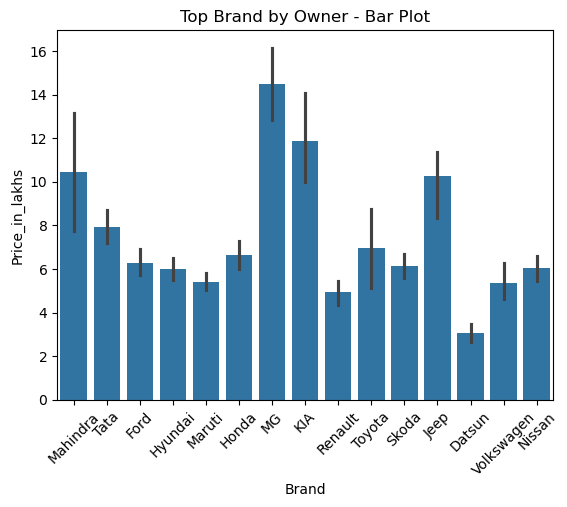

In [1014]:
data_ = df1[['Brand','owner']].copy()
data_= data_.sort_values(by = ['owner'],ascending = False).head(10)
sns.barplot(x='Brand',y='Price_in_lakhs', data=owner_1 )
plt.xticks(rotation=45)
plt.title('Top Brand by Owner - Bar Plot')
plt.show();

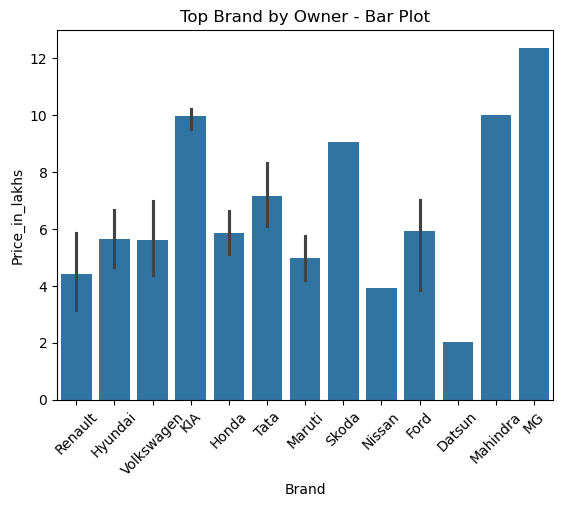

In [1015]:
data_ = df1[['Brand','owner']].copy()
data_= data_.sort_values(by = ['owner'],ascending = False).head(10)
sns.barplot(x='Brand',y='Price_in_lakhs', data=owner_2 )
plt.xticks(rotation=45)
plt.title('Top Brand by Owner - Bar Plot')
plt.show();

### CONCLUSION

- Maruti and Hyundai dominate the car market, indicating strong brand loyalty among consumers.
- Most cars are priced under 7.5 lakhs, with prices inversely related to mileage.
- Newer models (2022, 2019, 2017) retain higher resale value, comprising 63% of total cars.
- First-owner cars have a wider price range and better value retention compared to second-owner cars.
- Petrol vehicles are most prevalent, particularly in resale markets, with consistent price growth observed 
  over time. 

### SUGGESTION TO BUYER

- Focus on buying popular brands like Maruti or Hyundai, particularly newer models from 2022, 2019, or 2017 for better resale value.
- Target petrol cars with mileage between 20,000 km and 80,000 km, as they are the most available and commonly resold.
- Opt for first-owner vehicles to ensure better maintenance and wider price distribution, enhancing overall value.